# Prediction of risk factors of Heart Failure

In [2]:
pwd

'C:\\Users\\MaryGER'

In [3]:
#Importing Relevant Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [4]:
# Load dataset
heart_fail = pd.read_csv('C:\\Users\\MaryGER\heart_failure_clinical_records_dataset.csv')

### Exploring dataset

In [5]:
heart_fail.shape

(299, 13)

In [6]:
heart_fail.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [9]:
heart_fail.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


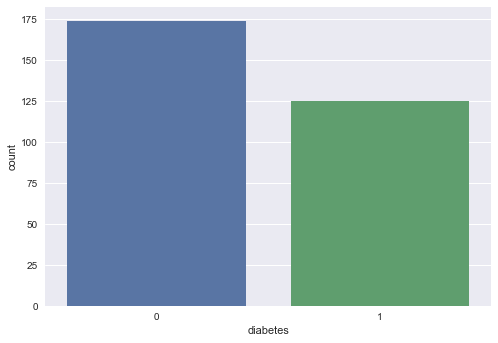

In [36]:
sns.countplot(x="diabetes", data=heart_fail)
sns.plt.show()

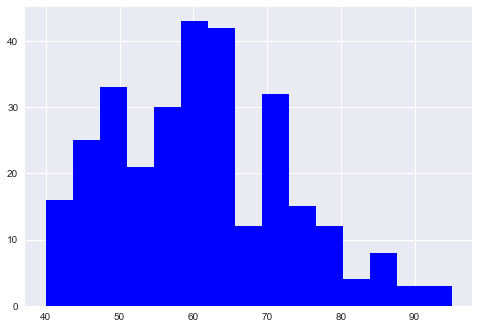

In [42]:
hist_age=heart_fail['age']
plt.hist(hist_age, 15,  facecolor='blue')
plt.grid(True)
plt.show()

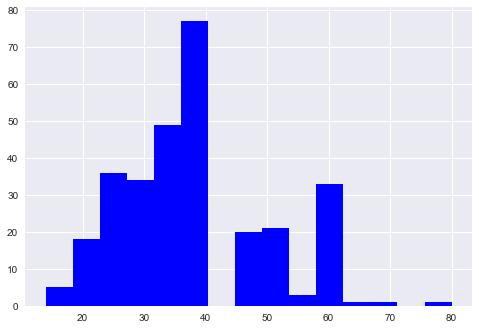

In [43]:
hist_fraction=heart_fail['ejection_fraction']
plt.hist(hist_fraction, 15,  facecolor='blue')
plt.grid(True)
plt.show()

In [33]:
import seaborn
print('seaborn: {}'.format(seaborn.__version__))

seaborn: 0.7.1


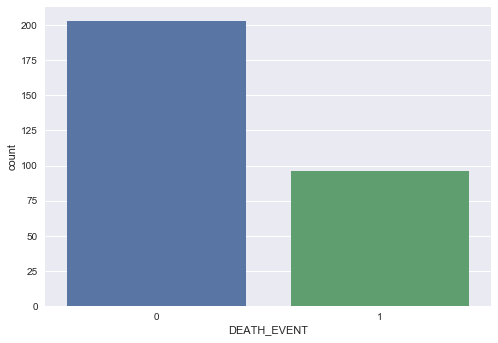

In [35]:
sns.countplot(x="DEATH_EVENT", data=heart_fail, )
sns.plt.show()

### cleaning the data

False


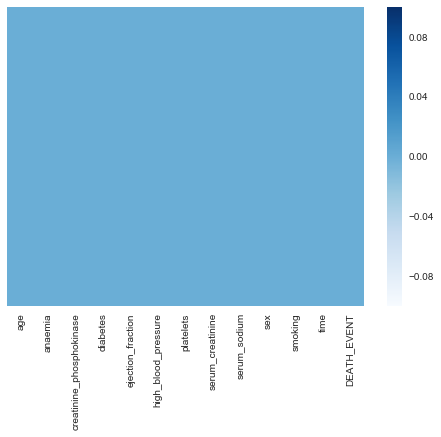

In [41]:
#Finding the Null values
print (heart_fail.isnull().values.any())
sns.heatmap(heart_fail.isnull(),yticklabels=False,cbar=True ,cmap='Blues')
sns.plt.show()

#### The correlation between the features.

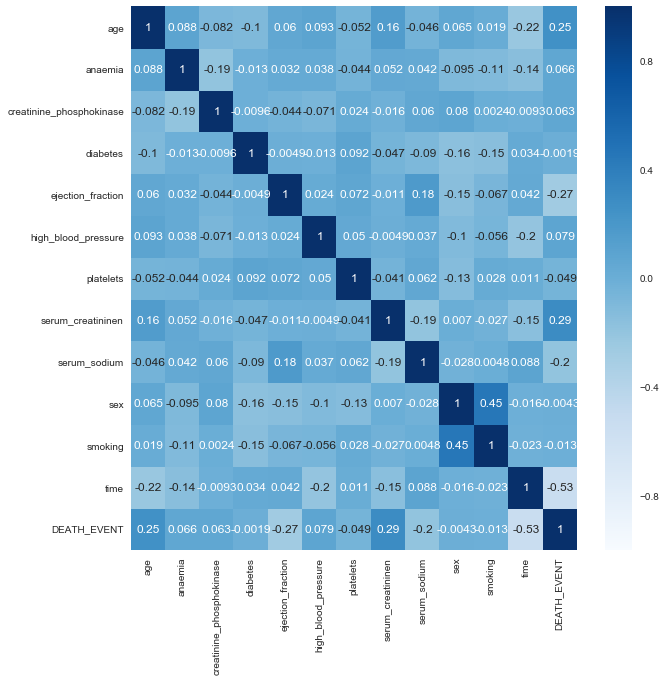

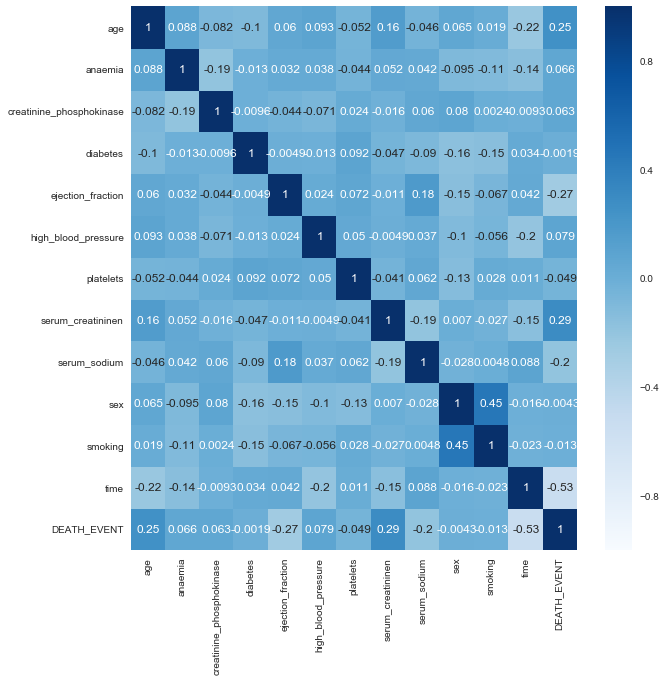

In [65]:
plt.figure(figsize=(10,10))
x_axis_labels = ['age','anaemia','creatinine_phosphokinase', 'diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatininen', 'serum_sodium','sex','smoking','time', 'DEATH_EVENT'] # labels for x-axis
y_axis_labels = ['age','anaemia','creatinine_phosphokinase', 'diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatininen', 'serum_sodium','sex','smoking','time', 'DEATH_EVENT'] # labels for y-axis
sns.heatmap(heart_fail.corr(), vmin=-1, cmap='Blues', annot=True, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.show()

### train_test_split

In [44]:
array = heart_fail.values
X = array[:, :12]
Y = array[:, 12]

In [49]:
from sklearn.model_selection import train_test_split
#Split into 20% (test) and 80% (train)
X_train, X_test, y_train, y_test= train_test_split(X,Y,test_size=0.2,random_state=1)
from sklearn.linear_model import LogisticRegression

### the Standard Scalar

In [51]:
# Standard Scalar
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
rescaled_X = scalar.fit_transform(X_train)
print(rescaled_X[:5])

[[-1.33194278  1.11069566 -0.4576634  -0.84818893 -0.24318058 -0.72269841
  -0.89319445 -0.58084862  0.51465589  0.72941845  1.52297224 -0.10575054]
 [-0.4999137  -0.90033664 -0.51894319 -0.84818893  0.17737049 -0.72269841
  -0.57954879 -0.39670905  0.29500811  0.72941845 -0.65661079  1.33189826]
 [ 0.58172409  1.11069566  0.39546617  1.17898261 -0.24318058 -0.72269841
   0.15589621 -0.30463927 -0.58358301  0.72941845 -0.65661079  0.86979686]
 [-0.08389917  1.11069566 -0.02487488 -0.84818893 -0.66373165  1.38370306
  -1.40151673 -0.48877884  1.83254257 -1.37095517 -0.65661079 -0.43949044]
 [-0.08389917 -0.90033664 -0.35712624  1.17898261  0.00915007 -0.72269841
   0.78318753  1.44468663  1.17359923 -1.37095517 -0.65661079 -1.27384019]]


##  Feature Selection and Logistic Regression

In [55]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# the Recursive Feature Elimination Technique(RFE) used for feature selection
rfe = RFE(model, 6)
fit = rfe.fit(rescaled_X, y_train)

transformed_X = fit.transform(rescaled_X)

print(heart_fail.columns)
print('Num features : ', fit.n_features_)
print('Selected features : ', fit.support_)
print('Features ranking : ', fit.ranking_)

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')
Num features :  6
Selected features :  [ True False False False  True False  True  True  True False False  True]
Features ranking :  [1 7 2 3 1 5 1 1 1 4 6 1]


##### age, ejection_fraction, platelets, serum_creatinine, serum_sodium, time are seleted by RFE

In [56]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
name = 'LR'
model = LogisticRegression()
kfold = KFold(n_splits=10, random_state=1)
cv_results = cross_val_score(model, transformed_X, y_train,cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

LR: 0.790580 (0.091840)


###  Make Predictions

In [61]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model.fit(X_train, y_train)
predictions = model.predict(X_test)
print('The accurcay score of the test dataset : ', accuracy_score(y_test, predictions))
print('\nThe confusion matrix : \n', confusion_matrix(y_test, predictions))
print('\nFinally the classification report : \n', classification_report(y_test, predictions))



The accurcay score of the test dataset :  0.883333333333

The confusion matrix : 
 [[43  3]
 [ 4 10]]

Finally the classification report : 
              precision    recall  f1-score   support

        0.0       0.91      0.93      0.92        46
        1.0       0.77      0.71      0.74        14

avg / total       0.88      0.88      0.88        60

